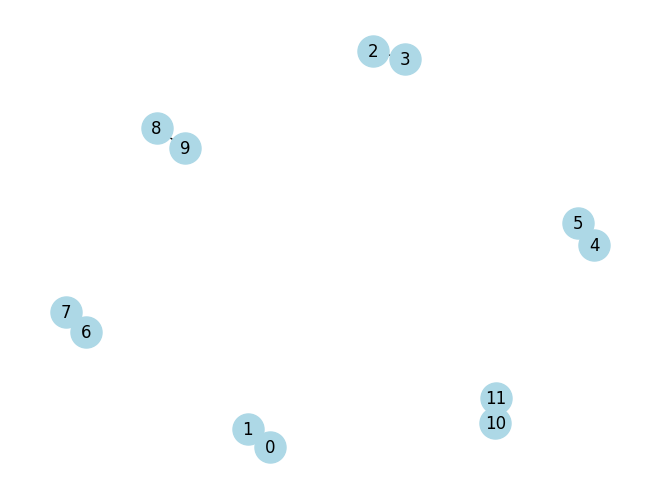

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Number of connected components
M = 6

# Create a new graph
G = nx.Graph()

# Add nodes and edges for each K_2 component
for i in range(M):
    node1 = 2 * i
    node2 = 2 * i + 1
    G.add_edge(node1, node2)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)
plt.show()


In [66]:
from deepwalk import deepwalk
dim = 2

model = deepwalk(G, 100, 20, 2)

Generating walks
Training word2vec


In [67]:
nodes = model.wv.index_to_key
    
DeepWalk_embeddings = np.empty(shape=(len(nodes), dim))

for idx, node in enumerate(nodes):
    DeepWalk_embeddings[idx, : ] = model.wv[node]

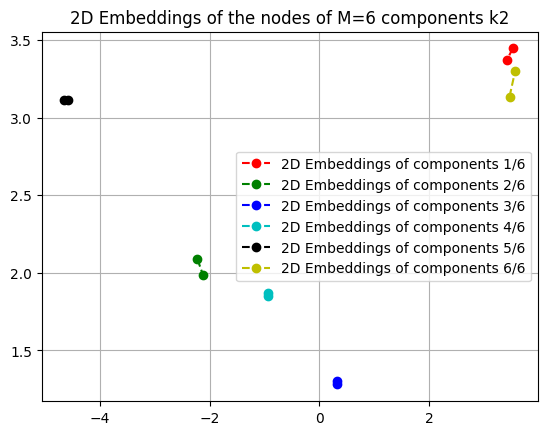

In [69]:
COLORS = 'rgbckym'

for i in range(M):
    plt.plot(DeepWalk_embeddings[i*2:i*2+2, 0], DeepWalk_embeddings[i*2:i*2+2, 1], "--o", c=COLORS[i%len(COLORS)],
             label=f"2D Embeddings of components {i+1}/{M}")
plt.title(f"2D Embeddings of the nodes of M={M} components k2")
plt.legend()
plt.grid()
plt.show()